## Review class

In this review we will download and process a large **.csv** file.  We choose the **Victoria Police Department Crime Database**.

In [1]:
%%bash
wget https://moto.data.socrata.com/api/views/f42u-v6f3/rows.csv?accessType=DOWNLOAD -O vicpd.csv

--2018-04-13 02:05:13--  https://moto.data.socrata.com/api/views/f42u-v6f3/rows.csv?accessType=DOWNLOAD
Resolving moto.data.socrata.com (moto.data.socrata.com)... 52.206.140.205
Connecting to moto.data.socrata.com (moto.data.socrata.com)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: 'vicpd.csv'

     0K .......... .......... .......... .......... ..........  663K
    50K .......... .......... .......... .......... ..........  663K
   100K .......... .......... .......... .......... ..........  146M
   150K .......... .......... .......... .......... ..........  216M
   200K .......... .......... .......... .......... ..........  659K
   250K .......... .......... .......... .......... ..........  281M
   300K .......... .......... .......... .......... ..........  304M
   350K .......... .......... .......... .......... ..........  675K
   400K .......... .......... .......... .......... .......... 54.3M
   45

In [2]:
fname = "vicpd.csv"
with open(fname) as f:
    content = f.readlines()
    print(content[0])
    # the keys are the first line of the file, let's split it and save as a key array.
    # first, let's remove the \n.
    keys = content[0].translate({ord(c) : None for c in '\n'})
    keys = keys.split(",")
    ## good, now let's collect the records into a list of dicts.
    mList = []
    for i in range(1, len(content)):
        line = content[i].translate({ord(c) : None for c in '\n'})
        line = line.split(",")
        dat = {keys[j] : line[j] for j in range(len(line))}
        mList.append(dat)
    print(len(mList),  "records")

incident_id,case_number,incident_datetime,incident_type_primary,incident_description,clearance_type,address_1,address_2,city,state,zip,country,latitude,longitude,created_at,updated_at,location,hour_of_day,day_of_week,parent_incident_type

114907 records


In [ ]:
#mlist is a list of dictionaries looks like 

In [3]:
## next, let's make the records more useful. 
#print(mList[1])
import datetime as dt

## let's make the:
##  python datetime objects for incident_datetime, updated_at, created_at
for x in mList:
    x['incident_datetime'] = dt.datetime.strptime(x['incident_datetime'], "%m/%d/%Y %I:%M:%S %p")
    x['updated_at'] = dt.datetime.strptime(x['updated_at'], "%m/%d/%Y %I:%M:%S %p")
    x['created_at'] = dt.datetime.strptime(x['created_at'], "%m/%d/%Y %I:%M:%S %p")


print(mList[1])

{'case_number': '18-11724', 'clearance_type': '', 'state': 'BC', 'incident_id': '842304288', 'incident_type_primary': 'THEFT-SHOPLIFTING UNDER $5000', 'city': 'VICTORIA', 'incident_datetime': datetime.datetime(2018, 3, 22, 17, 28), 'created_at': datetime.datetime(2018, 4, 11, 18, 59), 'hour_of_day': '17', 'country': '', 'zip': '', 'updated_at': datetime.datetime(2018, 4, 11, 21, 45, 33), 'parent_incident_type': 'Theft', 'day_of_week': 'Thursday', 'incident_description': '"<b>THEFT-SHOPLIFTING UNDER $5000 (Concluded)</b>&nbsp;&nbsp;<br />Please <a href=""http://www.vicpd.ca/public-information/crimereports/crimereports-disclaimer.aspx"" target=""_blank"">click here</a> to view our disclaimer."', 'latitude': '48.42558111797001', 'longitude': '-123.36505409777959', 'location': 'POINT (-123.36505409778 48.42558111797)', 'address_1': '1200 Block DOUGLAS ST', 'address_2': ''}


In [4]:
##  make location a pair of floats
for x in mList:
    if x['address_2'].upper() != '':
        print(x)

In [5]:
##  check to see if some elements can be removed. country. zip. clearance_type. day_of_week. 
##    incident_description. state. address_2. longiitude. hour_of_day. etc.
for x in mList:
    del x['zip']
    del x['country']
    del x['day_of_week']
    del x['state']
    del x['clearance_type']
    del x['incident_description']
    del x['address_2']
    del x['hour_of_day']

In [6]:
print(mList[0])

{'case_number': '16-22918', 'incident_id': '760527874', 'incident_type_primary': 'CAUSE A DISTURBANCE', 'city': 'VICTORIA', 'incident_datetime': datetime.datetime(2016, 5, 25, 1, 29), 'created_at': datetime.datetime(2016, 5, 26, 9, 46, 43), 'updated_at': datetime.datetime(2016, 6, 23, 19, 40, 33), 'parent_incident_type': 'Disorder', 'latitude': '48.4255680718449', 'longitude': '-123.348998693722', 'location': 'POINT (-123.348998693722 48.4255680718449)', 'address_1': '1200 Block JOHNSON ST'}


In [7]:
## let's make latitude and longitude into floats, and make the location a pair. then erase latitude and longitude.
## first, let's purge the one record that does not have a location

newList = []
for x in mList:
    if x['longitude'] == '':
        continue
    newList.append(x)
mList = newList

for x in mList:
    x['longitude'] = float(x['longitude'])
    x['latitude'] = float(x['latitude'])
    x['location'] = (x['latitude'], x['longitude'])
    del x['longitude']
    del x['latitude']
    
print(mList[0])

{'case_number': '16-22918', 'incident_id': '760527874', 'incident_type_primary': 'CAUSE A DISTURBANCE', 'city': 'VICTORIA', 'incident_datetime': datetime.datetime(2016, 5, 25, 1, 29), 'created_at': datetime.datetime(2016, 5, 26, 9, 46, 43), 'updated_at': datetime.datetime(2016, 6, 23, 19, 40, 33), 'parent_incident_type': 'Disorder', 'location': (48.4255680718449, -123.348998693722), 'address_1': '1200 Block JOHNSON ST'}


In [8]:
## let's make a breakdown of all the crime types as a dict of sets.
import collections as pyco
cTypes = pyco.defaultdict(set)

for x in mList:
    cTypes[x['parent_incident_type']].add(x['incident_type_primary'])
    
for k in cTypes.keys():
    print(k, ': ', sep='', end='')
    for x in cTypes[k]:
        print(x, end=', ')
    print('\n', end='')


Community Policing: CITIZEN ASSIST, BUSINESS, 
Theft of Vehicle: THEFT MOTORCYCLE UNDER $5000, THEFT OTHER VEHICLE U/$5000, TAKE AUTO W/O CONSENT U/$5000, THEFT OF TRUCK OVER $5000, THEFT OF AUTO OVER $5000, THEFT OF AUTO UNDER $5000, THEFT OF TRUCK UNDER $5000, 
Disorder: CAUSE A DISTURBANCE, 
Drugs: POSSESSION-MDMA (ECSTASY), POSSESS-OTH SCHED I DRUGS/SUBS, TRAFFICKING-OTH SCHED IV CDSA, POSSESSION-COCAINE, TRAFFICKING-METHAMPHETAMINE, TRAFFICKING-HEROIN, TRAFFICKING-OTHER CDSA, POSSESSION-CANNABIS OVER 30G, TRAFFICK-CANNABIS OVER 3000G, POSSESSION-METHAMPHETAMINE, TRAFFICKING-AMPHETAMINE, TRAFFICK-CANNABIS 3000G & UNDR, POSSESS-OTH SCHED III DRUG/SUB, POSSESSION-CANNABIS 30G & UNDR, POSSESSION-HEROIN, TRAFFICKING-COCAINE, TRAFFICKING-MORPHINE, 
Assault: ASSAULT AGAINST POLICE OFFICER, ASSAULT-COMMON OR TRESPASS, ASSAULTS-OTHER, 
Robbery: ROBBERY W/OTHER OFFENSIVE WPN, ROBBERY-OTHER, 
Breaking & Entering: BREAK & ENTER-OTHER, BREAK & ENTER-RESIDENCE, BREAK & ENTER-BUSINESS, 
Alarm: F

In [9]:
## let's work out the percentages of the parent types and incident types, respectively, and make them into
## pie charts.

cCount = pyco.defaultdict(int)
for x in mList:
    cCount[x['parent_incident_type']] += 1
    cCount[(x['parent_incident_type'], x['incident_type_primary'])] += 1
    
for k,v in cCount.items():
    if isinstance(k, str):
        print(k, v)
print("\n")

## and let's print out all the Traffic types
for k,v in cCount.items():
    if isinstance(k, tuple) and k[0]=='Traffic':
        print(k, v)
        

Robbery 710
Assault with Deadly Weapon 1623
Breaking & Entering 4698
Theft 19359
Theft of Vehicle 1269
Other 21978
Traffic 20344
Theft from Vehicle 9449
Community Policing 46
Assault 2909
Liquor 9854
Alarm 1314
Property Crime 8064
Disorder 3365
Drugs 3391
Vehicle Stop 5388
Arson 240
Weapons Offense 905


('Traffic', 'TRAFFIC-OTHER MOVING PROV') 3094
('Traffic', 'TRAFFIC-OTHER FEDERAL') 37
('Traffic', 'DRIVING COMPLAINTS') 2986
('Traffic', 'EXCESSIVE SPEED-OVER 40KM') 13
('Traffic', 'COLLISION-DAMAGE UNDER $1000') 2100
('Traffic', 'COLLISION-NON-FATAL INJURY') 1491
('Traffic', 'TRAFFIC-WRITTEN WARNING') 50
('Traffic', '215ALCOH IRP WARN-3DAY') 457
('Traffic', 'TRAFFIC-OTHER MUNICIPAL') 392
('Traffic', '215ALCOH IRP WARN-30DAY') 23
('Traffic', '215 DRUG') 404
('Traffic', 'TRAFFIC-INSURANCE VIOLATION') 3035
('Traffic', 'COLLISION-DAMAGE OVER $1000') 2816
('Traffic', '215 ALCOH-24HR') 403
('Traffic', 'TRAFFIC-OTHER NON-MOVE PROV') 1237
('Traffic', '215ALCOH IRP WARN-7DAY') 31
('Traffic', '

18


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


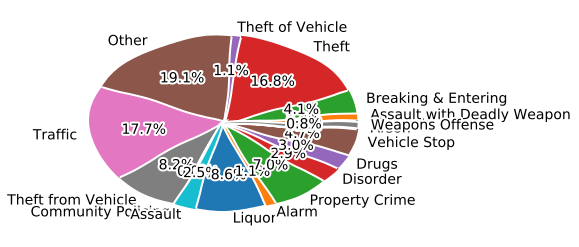

In [10]:
## let's make some pie charts. First the primary crime types.

pct = [100*v/len(mList) for k,v in cCount.items() if isinstance(k, str)]
lab = [k for k,v in cCount.items() if isinstance(k,str)]
print(len(pct))

import matplotlib.pyplot as plt
with plt.xkcd(): ## this enables the xkcd style.
    plt.pie(pct, labels=lab, autopct='%1.1f%%')

17


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


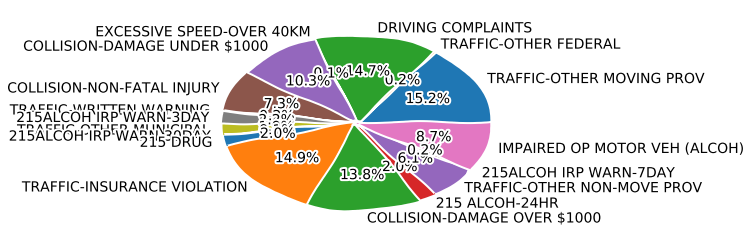

In [11]:
## let's make some pie charts. Let's do another for traffic

pct = [100*v/cCount['Traffic'] for k,v in cCount.items() if isinstance(k, tuple) and k[0]=='Traffic']
lab = [k[1] for k,v in cCount.items() if isinstance(k,tuple) and k[0]=='Traffic']
print(len(pct))

import matplotlib.pyplot as plt
with plt.xkcd(): ## this enables the xkcd style.
    plt.pie(pct, labels=lab, autopct='%1.1f%%')

In [12]:
import folium as fo
from folium import plugins as fpl

## heat plot of all driving complaints

hdat = [[x['location'][0], x['location'][1], 0.02] for x in mList \
        if x['incident_type_primary'] == 'DRIVING COMPLAINTS']

mapa = fo.Map([48.4323, -123.3720], tiles='Stamen Terrain', zoom_start=13)
mapa.add_child(fpl.HeatMap(hdat))
mapa
